___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train[5].shape
# Checking the shape of one image

(28, 28)

In [5]:
#Its 28 rows and 28 columns array

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

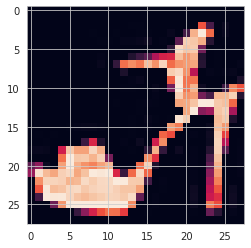

In [8]:
plt.imshow(X_train[9])
# plt.matshow(X_train[9])
#image located on 9 index

In [9]:
classes[int(X_train[9][0][0])]

'T-shirt/top'

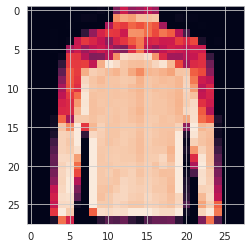

In [10]:
plt.imshow(X_train[1729])
# plt.matshow(X_train[9])
#image located on 9 index

In [11]:
classes[int(X_train[1729][0][0])]

'T-shirt/top'

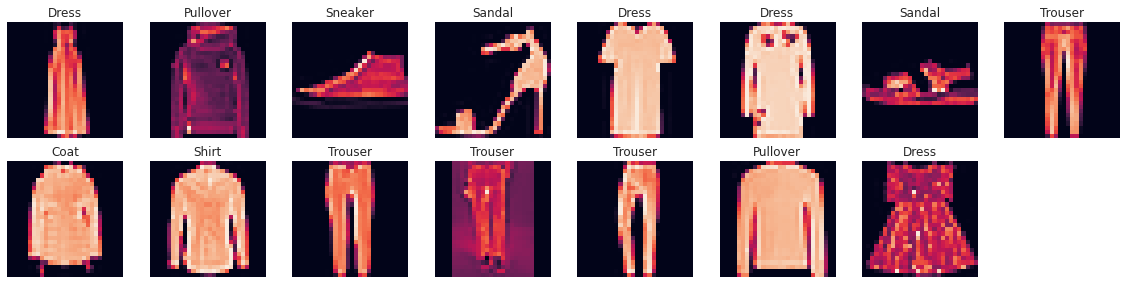

In [12]:
plt.figure(figsize=(20, 20))
for i in range(15):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

In [13]:
#15 random images

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train[5].min()

0

In [15]:
X_train[5].max()

255

In [16]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
X_train[5].min()

0.0

In [18]:
X_train[5].max()

1.0

In [19]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
#one hot encoding
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [25]:
y_train[9]

5

In [26]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 21s 4ms/step - loss: 0.3870 - accuracy: 0.8622 - val_loss: 0.3046 - val_accuracy: 0.8887
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9054 - val_loss: 0.2919 - val_accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2195 - accuracy: 0.9192 - val_loss: 0.2526 - val_accuracy: 0.9074
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1863 - accuracy: 0.9309 - val_loss: 0.2560 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1583 - accuracy: 0.9411 - val_loss: 0.2485 - val_accuracy: 0.9159
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1331 - accuracy: 0.9505 - val_loss: 0.2518 - val_accuracy: 0.9171
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9580 - val_loss: 0.2857 - val_accuracy

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.387,0.862,0.305,0.889
1,0.262,0.905,0.292,0.896
2,0.219,0.919,0.253,0.907
3,0.186,0.931,0.256,0.906
4,0.158,0.941,0.248,0.916


**TASK 7: Plot values of metrics you used in your model.**

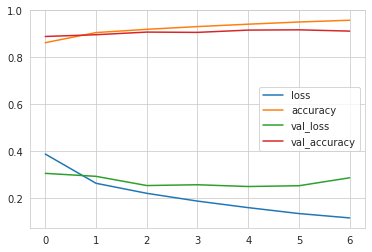

In [36]:
summary.plot();

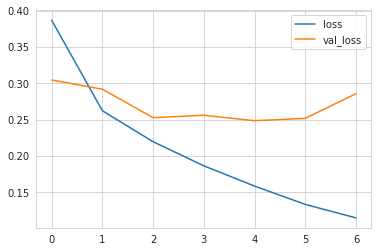

In [37]:
summary[["loss", "val_loss"]].plot();

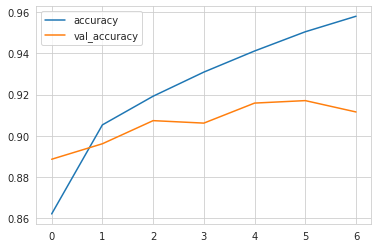

In [38]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [40]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9159


[0.2484612762928009, 0.9158999919891357]

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2484612762928009
Test accuracy: 0.9158999919891357


In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2484612762928009
Test accuracy: 0.9158999919891357


In [43]:
pred_prob = model.predict(X_test)
pred_prob

array([[2.2404873e-05, 2.6453824e-09, 1.2638559e-07, ..., 2.6331516e-03,
        1.3724477e-06, 9.9727231e-01],
       [9.9416147e-06, 1.3712032e-13, 9.9998331e-01, ..., 1.4703772e-16,
        9.3672167e-14, 2.3860983e-12],
       [8.5377792e-07, 9.9999893e-01, 1.2630341e-07, ..., 1.1144907e-11,
        6.5672606e-10, 1.0719077e-11],
       ...,
       [3.0246497e-08, 1.9165533e-13, 1.6599142e-09, ..., 5.2784777e-09,
        9.9999559e-01, 1.4735884e-11],
       [4.1121314e-07, 9.9999785e-01, 1.0163349e-07, ..., 9.2622127e-10,
        3.5416667e-10, 1.8476632e-08],
       [1.6713915e-04, 1.0826062e-06, 2.9303861e-04, ..., 3.4800410e-02,
        6.9243237e-03, 8.6936075e-04]], dtype=float32)

In [44]:
pred_prob.shape

(10000, 10)

In [45]:
pred_prob[0]

array([2.2404873e-05, 2.6453824e-09, 1.2638559e-07, 2.0303985e-09,
       5.3547392e-08, 7.0118964e-05, 3.9542172e-07, 2.6331516e-03,
       1.3724477e-06, 9.9727231e-01], dtype=float32)

In [46]:
np.argmax(pred_prob[0])

9

In [47]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
y_pred.shape

(10000,)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.89      0.86      0.87      1000
           3       0.90      0.93      0.92      1000
           4       0.85      0.88      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.79      0.72      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [50]:
print(confusion_matrix(y_test, y_pred))

[[898   0   8  12   5   2  69   0   6   0]
 [  0 975   0  16   4   0   4   0   1   0]
 [ 18   1 856   6  57   0  61   0   1   0]
 [ 19   0   6 932  20   2  19   0   2   0]
 [  0   1  50  34 878   0  35   0   2   0]
 [  0   0   0   0   0 992   0   6   0   2]
 [126   1  45  26  69   0 722   0  11   0]
 [  0   0   0   0   0  18   0 963   1  18]
 [  3   0   1   4   1   2   1   2 986   0]
 [  1   0   0   0   0  10   0  32   0 957]]


In [51]:
classes[0]

'T-shirt/top'

In [52]:
classes[7]

'Sneaker'

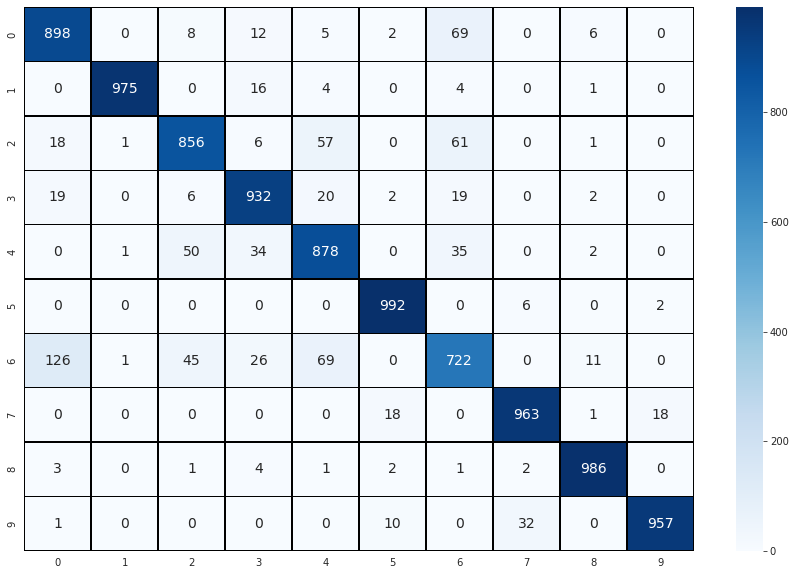

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [54]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [55]:
(y_test != y_pred).sum()

841

## Prediction

In [59]:
my_image = X_test[3]

In [60]:
my_image.shape

(28, 28, 1)

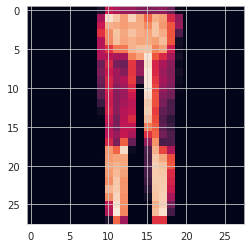

In [61]:
plt.imshow(my_image.reshape(28,28));

In [62]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[1.8112949e-07, 9.9999607e-01, 9.4409963e-08, 2.6030400e-06,
        9.3018235e-07, 1.6176388e-09, 2.3510765e-08, 2.8062991e-10,
        1.1323129e-10, 2.8184988e-09]], dtype=float32)

In [63]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [64]:
model.save("cnn-1.h5")

In [65]:
model=tf.keras.models.load_model('cnn-1.h5')

In [67]:
pred=model.predict(np.expand_dims(X_test[5555],axis=0))

In [68]:
np.argmax(pred)

0

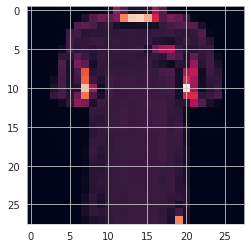

In [71]:
plt.imshow(X_test[5555].reshape(28,28))

In [72]:
classes[0]

'T-shirt/top'

In [73]:
pred=model.predict(np.expand_dims(X_test[50],axis=0))

In [75]:
np.argmax(pred)

4

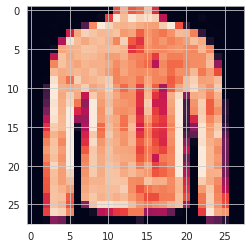

In [76]:
plt.imshow(X_test[50].reshape(28,28))

In [77]:
classes[4]

'Coat'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___